In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from numpy import split
from numpy import array
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy.solvers import solve
from sympy import Symbol

# ARIMA Predictive Modeling

## Fresh Apples

In [45]:
usdaGlobal_HighCorrHoney = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\usdaGlobal_HighCorr_Honey.csv")
usdaGlobal_HighCorrHoney

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
0,"Almonds, Shelled Basis",1998,235884,US,United States,Production,(MT)
1,"Almonds, Shelled Basis",1999,377800,US,United States,Production,(MT)
2,"Almonds, Shelled Basis",2000,318900,US,United States,Production,(MT)
3,"Almonds, Shelled Basis",2001,376500,US,United States,Production,(MT)
4,"Almonds, Shelled Basis",2002,494416,US,United States,Production,(MT)
...,...,...,...,...,...,...,...
307,"Walnuts, Inshell Basis",2017,589670,US,United States,Production,(MT)
308,"Walnuts, Inshell Basis",2018,625958,US,United States,Production,(MT)
309,"Walnuts, Inshell Basis",2019,594206,US,United States,Production,(MT)
310,"Walnuts, Inshell Basis",2020,712140,US,United States,Production,(MT)


In [46]:
# Picking highly correlated commodity in fruits and vegetables  - Fresh Apples, Corn, Grapefruit.

FreshApples_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Apples, Fresh']

Corn_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Corn']

Grapefruit_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Grapefruit, Fresh']

In [47]:
FreshApples_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
24,"Apples, Fresh",1998,5282724,US,United States,Production,(MT)
25,"Apples, Fresh",1999,5746060,US,United States,Production,(MT)
26,"Apples, Fresh",2000,5675890,US,United States,Production,(MT)
27,"Apples, Fresh",2001,5065060,US,United States,Production,(MT)
28,"Apples, Fresh",2002,4605810,US,United States,Production,(MT)
29,"Apples, Fresh",2003,4780600,US,United States,Production,(MT)
30,"Apples, Fresh",2004,5683040,US,United States,Production,(MT)
31,"Apples, Fresh",2005,5261960,US,United States,Production,(MT)
32,"Apples, Fresh",2006,5351610,US,United States,Production,(MT)
33,"Apples, Fresh",2007,4154195,US,United States,Production,(MT)


In [48]:
FreshApples_DS = FreshApples_DS[['Year', 'Value']].copy()
FreshApples_DS

,Year,Value
24,1998,5282724
25,1999,5746060
26,2000,5675890
27,2001,5065060
28,2002,4605810
29,2003,4780600
30,2004,5683040
31,2005,5261960
32,2006,5351610
33,2007,4154195


In [49]:
Corn_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
96,Corn,1998,4822010000,US,United States,Production,(MT)
97,Corn,1999,4800686000,US,United States,Production,(MT)
98,Corn,2000,4274204000,US,United States,Production,(MT)
99,Corn,2001,3866379000,US,United States,Production,(MT)
100,Corn,2002,3988483000,US,United States,Production,(MT)
101,Corn,2003,4740312000,US,United States,Production,(MT)
102,Corn,2004,4476775000,US,United States,Production,(MT)
103,Corn,2005,4463810000,US,United States,Production,(MT)
104,Corn,2006,4460544000,US,United States,Production,(MT)
105,Corn,2007,508020000,US,United States,Production,(MT)


In [50]:
Corn_DS = Corn_DS[['Year', 'Value']].copy()
Corn_DS

,Year,Value
96,1998,4822010000
97,1999,4800686000
98,2000,4274204000
99,2001,3866379000
100,2002,3988483000
101,2003,4740312000
102,2004,4476775000
103,2005,4463810000
104,2006,4460544000
105,2007,508020000


In [51]:
Grapefruit_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
144,"Grapefruit, Fresh",1998,185000,US,United States,Production,(MT)
145,"Grapefruit, Fresh",1999,183000,US,United States,Production,(MT)
146,"Grapefruit, Fresh",2000,163000,US,United States,Production,(MT)
147,"Grapefruit, Fresh",2001,163000,US,United States,Production,(MT)
148,"Grapefruit, Fresh",2002,186000,US,United States,Production,(MT)
149,"Grapefruit, Fresh",2003,146000,US,United States,Production,(MT)
150,"Grapefruit, Fresh",2004,9294000,US,United States,Production,(MT)
151,"Grapefruit, Fresh",2005,1679000,US,United States,Production,(MT)
152,"Grapefruit, Fresh",2006,267598000,US,United States,Production,(MT)
153,"Grapefruit, Fresh",2007,338295000,US,United States,Production,(MT)


In [52]:
Grapefruit_DS = Grapefruit_DS[['Year', 'Value']].copy()
Grapefruit_DS

,Year,Value
144,1998,185000
145,1999,183000
146,2000,163000
147,2001,163000
148,2002,186000
149,2003,146000
150,2004,9294000
151,2005,1679000
152,2006,267598000
153,2007,338295000


In [53]:
# Renaming the column Value

FreshApples_DS.rename(columns = {'Value':'FreshApplesProd'}, inplace = True)

Corn_DS.rename(columns = {'Value':'CornProd'}, inplace = True)

Grapefruit_DS.rename(columns = {'Value':'FreshGrapefruitProd'}, inplace = True)

In [54]:
FreshApples_DS

,Year,FreshApplesProd
24,1998,5282724
25,1999,5746060
26,2000,5675890
27,2001,5065060
28,2002,4605810
29,2003,4780600
30,2004,5683040
31,2005,5261960
32,2006,5351610
33,2007,4154195


In [55]:
Corn_DS

,Year,CornProd
96,1998,4822010000
97,1999,4800686000
98,2000,4274204000
99,2001,3866379000
100,2002,3988483000
101,2003,4740312000
102,2004,4476775000
103,2005,4463810000
104,2006,4460544000
105,2007,508020000


In [56]:
Grapefruit_DS

,Year,FreshGrapefruitProd
144,1998,185000
145,1999,183000
146,2000,163000
147,2001,163000
148,2002,186000
149,2003,146000
150,2004,9294000
151,2005,1679000
152,2006,267598000
153,2007,338295000


In [57]:
# Saving the dataset as CSV file for future use


FreshApples_DS.to_csv("C:/Users/sdstc/Documents/Education/Other/Entity Academy/Final Project/Final Project/Datasets for Final Project/First Choice Dataset/FreshApples_ARIMA.csv", index = False)

In [58]:
# Formatting Year to date datatype 
FreshApples_DS['Year'] = pd.to_datetime(FreshApples_DS['Year'], format='%Y')

In [59]:
## Setting Year as index
FreshApples_DS.set_index('Year', inplace=True)
type(FreshApples_DS)

pandas.core.frame.DataFrame

In [60]:
FreshApples_DS

,FreshApplesProd
Year,
1998-01-01,5282724
1999-01-01,5746060
2000-01-01,5675890
2001-01-01,5065060
2002-01-01,4605810
2003-01-01,4780600
2004-01-01,5683040
2005-01-01,5261960
2006-01-01,5351610


<AxesSubplot:xlabel='Year'>

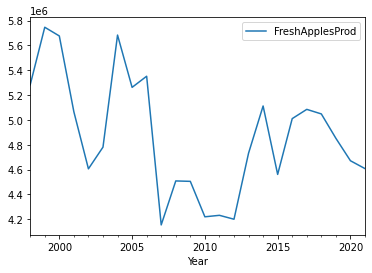

In [61]:
## Looking at linear plot of apple production
FreshApples_DS.plot()

In [62]:
## Linear plot displays a static relationship of ups and downs, thus signifying a lack of trend. So it is non-stationary.

In [63]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(FreshApples_DS['FreshApplesProd'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.689890586210837
n_lags: 0.07580403594068799
p-value: 0.07580403594068799
Critial Values:
   1%, -4.01203360058309
Critial Values:
   5%, -3.1041838775510207
Critial Values:
   10%, -2.6909873469387753


In [64]:
## As expected, the results of our ADF test is that our data is non-stationary. We must fail to reject the Null hypothesis as our p-value is not significant
## and our ADF Statistic is higher than our critical values. In other words, the Apple time series production data from 1998-2021 has some time-dependent structure 
## and does not have constant variance over time.

In [65]:
# Splitting the data for training and testing
train = FreshApples_DS[:20]
test = FreshApples_DS[-4:]

In [66]:
train

,FreshApplesProd
Year,
1998-01-01,5282724
1999-01-01,5746060
2000-01-01,5675890
2001-01-01,5065060
2002-01-01,4605810
2003-01-01,4780600
2004-01-01,5683040
2005-01-01,5261960
2006-01-01,5351610


In [67]:
test

,FreshApplesProd
Year,
2018-01-01,5048000
2019-01-01,4851625
2020-01-01,4671000
2021-01-01,4607646


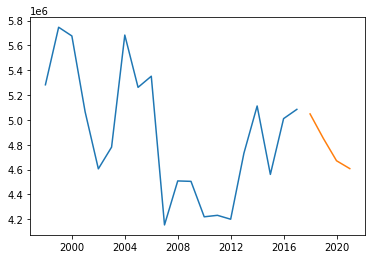

In [68]:
plt.plot(train)
plt.plot(test)

In [82]:
## Running auto_arima to obtain p, d, q variables
model = pm.auto_arima(FreshApples_DS['FreshApplesProd'], seasonal=False)
model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [70]:
# p= 1 d= 0 q= 0

In [115]:
# Manually Building Auto ARIMA model seasonal
arima_model =  auto_arima(train,start_p=1, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=582.501, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=585.803, Time=0.00 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=584.307, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=675.063, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=580.834, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=582.065, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=583.971, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=582.810, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=582.872, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=583.117, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=584.851, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.630 seconds


In [92]:
# Best model confirmed p=1 d=0 q=0; ARIMA(1,0,0)(0,0,0)[0] intercept when seasonal is false
# Best model confirmed p=1 d=0 q=0; ARIMA(1,0,0)(0,0,0)[12] intercept when seasonal is true

In [93]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -287.417
Date:                Mon, 18 Jul 2022   AIC                            580.834
Time:                        12:05:44   BIC                            583.821
Sample:                             0   HQIC                           581.417
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.203e+06   3.65e-09   6.04e+14      0.000     2.2e+06     2.2e+06
ar.L1          0.5522      0.018     30.037      0.000       0.516       0.588
sigma2      1.781e+11   1.24e-15   1.44e+26      0.000    1.78e+11    1.78e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.83   Prob(JB):                         0.94
Heteroskedasticity (H):               0.43   Skew:                            -0.19
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [117]:
# Forecasting on the test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 4),index=test.index)
prediction.columns = ['predicted_values']
prediction

,predicted_values
Year,
2018-01-01,5.010713e+06
2019-01-01,4.969844e+06
2020-01-01,4.947277e+06
2021-01-01,4.934815e+06


In [119]:
# Forecasting on the test data
prediction1 = pd.DataFrame(arima_model1.predict(n_periods = 4),index=test.index)
prediction1.columns = ['predicted_values']
prediction1

,predicted_values
Year,
2018-01-01,5.010713e+06
2019-01-01,4.969844e+06
2020-01-01,4.947277e+06
2021-01-01,4.934815e+06


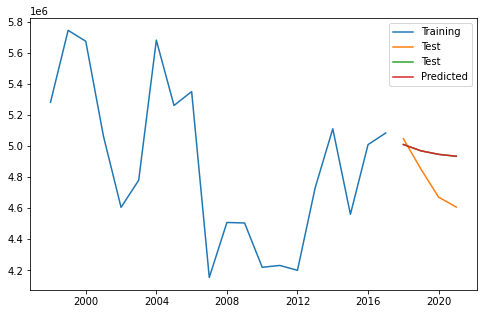

In [120]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [97]:
# Looking at R2 score
test['predicted_values'] = prediction
r2_score(test['FreshApplesProd'], test['predicted_values'])

C:\Users\sdstc\AppData\Local\Temp\ipykernel_13868\2932159147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_values'] = prediction


-0.6885945992988696

In [98]:
# Not too far from zero. We will take the R2 score for now!

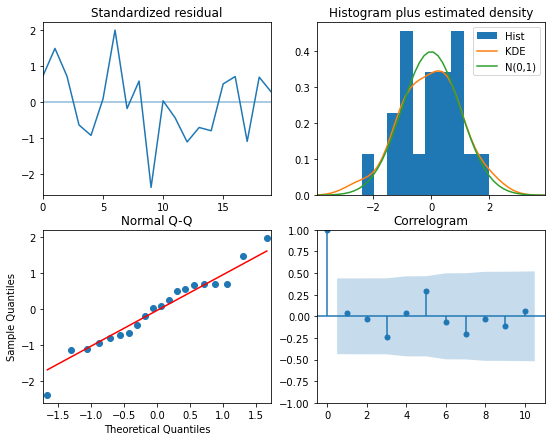

In [99]:
# Interpreting residual plots
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [100]:
### The mean is centered at zero, with an unequal variance.
### In the upper right, we can see how our predictions are spot on as the assumption has normal distribution and our actual density line is mostly normally distributed.
### Bottom Left looks pretty in line with the red
### In the bottom right, it looks as though the residual errors are not autocorrelated, which is good!
### Fit doesn't seem to be too off, so we will go with it!

In [101]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [102]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [103]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [104]:
# Appending Future DF to justalmonds DF
futureprediction = FreshApples_DS.append(future)
futureprediction

C:\Users\sdstc\AppData\Local\Temp\ipykernel_13868\4213167258.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureprediction = FreshApples_DS.append(future)


,FreshApplesProd,predicted_values
Year,,
1998-01-01,5282724.0,NaN
1999-01-01,5746060.0,NaN
2000-01-01,5675890.0,NaN
2001-01-01,5065060.0,NaN
2002-01-01,4605810.0,NaN
2003-01-01,4780600.0,NaN
2004-01-01,5683040.0,NaN
2005-01-01,5261960.0,NaN
2006-01-01,5351610.0,NaN


In [105]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast2 = pd.DataFrame(arima_model.predict(h), index=futureprediction.index)
forecast2.columns = ['predicted_values']
forecast2

,predicted_values
Year,
1998-01-01,5.010713e+06
1999-01-01,4.969844e+06
2000-01-01,4.947277e+06
2001-01-01,4.934815e+06
2002-01-01,4.927934e+06
2003-01-01,4.924134e+06
2004-01-01,4.922036e+06
2005-01-01,4.920878e+06
2006-01-01,4.920238e+06


In [109]:
# Visualize forecast with training data
time = np.arange(train.shape[0] + h)
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

InvalidIndexError: (slice(None, None, None), None)

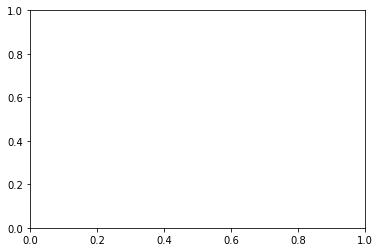

In [139]:
# Slice the x-axis to only plot the training data as the color black
plt.plot(time[:train.shape[0]], train, c = 'black')

# Slice the x-axis to plot our forecast after the training data as the color red
plt.plot(time[train.shape[0]:], forecast2, c = 'red')

# Set axis labels
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()